In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
%matplotlib inline

## K -means con HSV

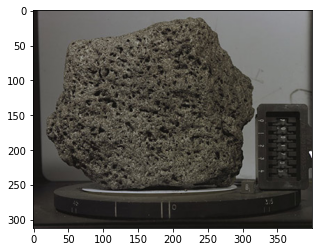

(312, 400, 3)

In [3]:
img = cv.imread('./material_TPs/TP5/roca_lunar_2.jpg')
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)
plt.show()
imgRGB.shape

In [4]:
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hsv.shape

(312, 400, 3)

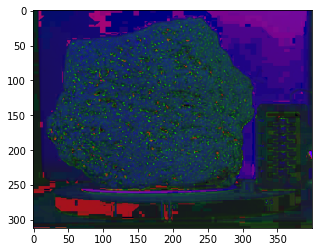

In [5]:
plt.figure()
plt.imshow(lab)
plt.show()

### Espacios de características

#### Espacio características color

In [20]:
features_color = hsv.reshape((-1,3))
features_color = np.float32(features_color)
features_color_norm = features_color/np.max(features_color, axis = 0)

print(features_color_norm.shape)
print(features_color_norm.dtype)

(124800, 3)
float32
0.0
1.0


##### Espacio características color + posición

In [8]:
# obtener posiciones
pos = []

for j in range(0, 312):
    for i in range(0, 400):
        pos.append((j,i))

pos= np.asarray(pos)

#features finales
features_pos = np.concatenate((features_color, pos), axis=1)
features_pos_norm = features_pos/np.max(features_pos, axis = 0)
features_pos_norm = np.float32(features_pos_norm)

print(features_pos_norm.shape)
print(features_pos_norm.dtype)
print(np.min(features_pos_norm))
print(np.max(features_pos_norm))

(124800, 5)
float32
0.0
1.0


### gráficas de distribuciones

#### Espacio de características de color

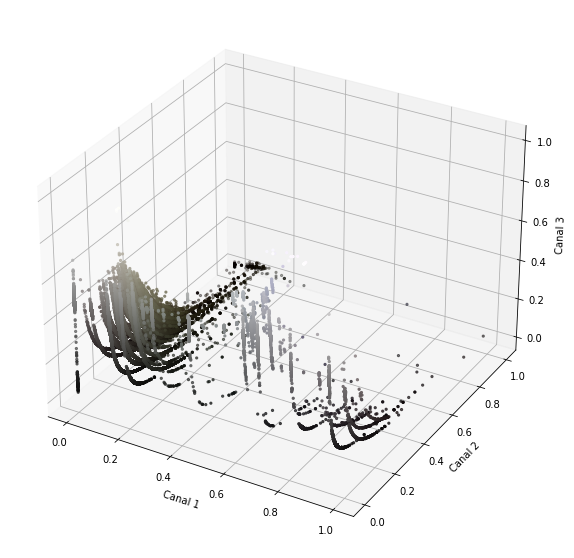

In [386]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(features_color_norm[:,0], features_color_norm[:,1], features_color_norm[:,2], facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()


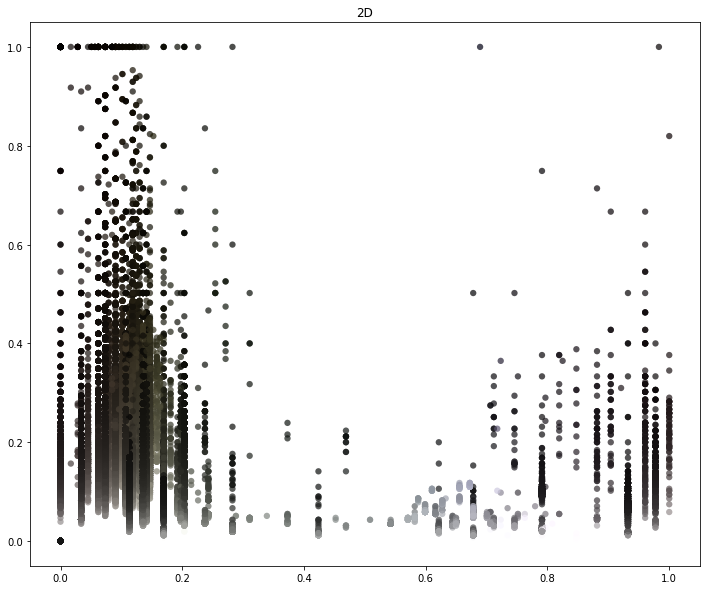

In [387]:
plt.figure(figsize=(12,10))
plt.scatter(features_color_norm[:,0], features_color_norm[:,1], c=pixel_colors, edgecolor='none', alpha=0.7, s=40)
plt.title('2D');

#### Espacio de características color + pos

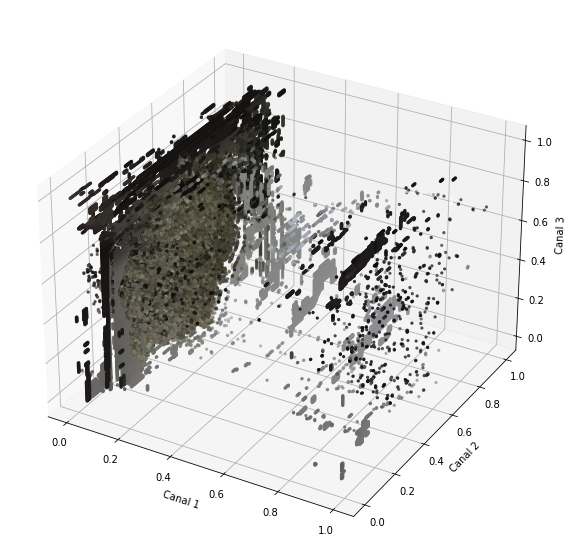

In [50]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(features_pos_norm[:,0], features_pos_norm[:,4], features_pos_norm[:,3], facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

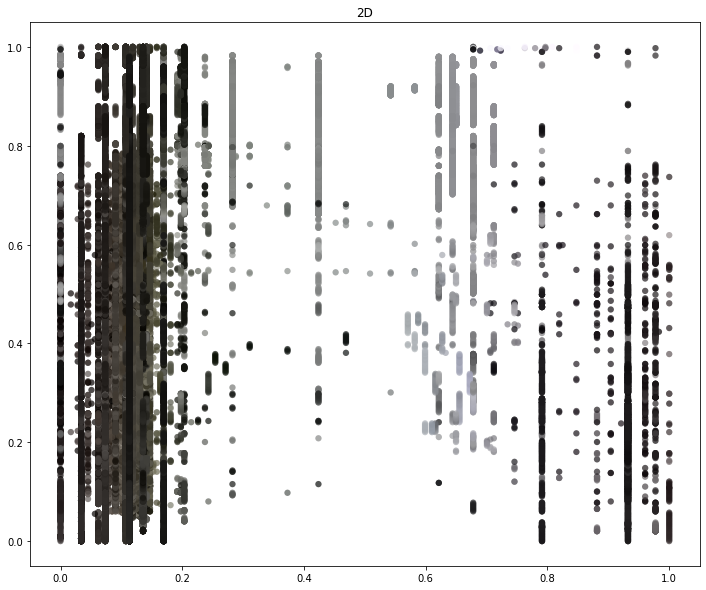

In [51]:
plt.figure(figsize=(12,10))
plt.scatter(features_pos_norm[:,0],features_pos_norm[:,4], c=pixel_colors, edgecolor='none', alpha=0.7, s=40)
plt.title('2D');

### Posterización

#### Espacio de características color

In [25]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
k = 4
compact, label, color_clusters = cv.kmeans(features_color_norm, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [26]:
color_clusters = np.uint8(color_clusters * np.max(features_color, axis = 0))
print(f'Centroides: \n {color_clusters} \n') 
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[ 29  23 111]
 [ 18 241   9]
 [140  13  96]
 [ 19  49  47]] 

Compactación: 
 199 



array([[3],
       [3],
       [3],
       [3]], dtype=int32)

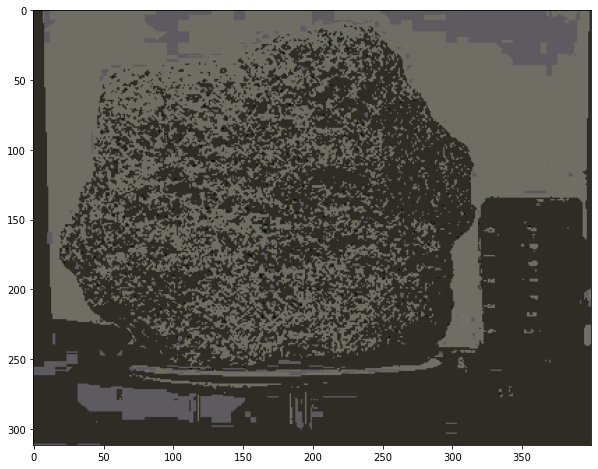

140

In [28]:
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((lab.shape))

img_rgb = cv.cvtColor(img_out,cv.COLOR_HSV2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.show()

np.max(img_out[:,0])

In [29]:
mask_list = list()
for cluster in color_clusters:
    mask = np.zeros(img_out.shape[:2],'uint8')
    mask[np.where((img_out == cluster).all(axis=2))] = 255
    mask_list.append(mask)

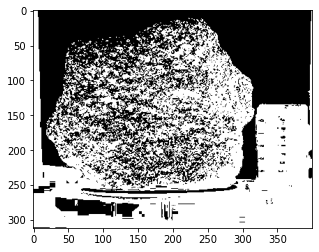

In [30]:
for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(lab, lab, mask = mask)
    plt.imshow(mask, cmap=plt.cm.gray)

#### Espacio de características color + pos

In [45]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k =10
compact, label, color_clusters = cv.kmeans(features_pos_norm, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [46]:
color_clusters = np.uint8(color_clusters * np.max(features_pos, axis = 0))
print(f'Centroides: \n {color_clusters} \n') 
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[162  20  48 205  93]
 [ 24  36  48   0  54]
 [ 22  47  74 131 250]
 [ 84   5 140  41  77]
 [ 19 119  26 137 236]
 [ 15  20 121  51 142]
 [160  28  33 249   6]
 [ 18  39  53 241  83]
 [ 15 159  18 134 107]
 [ 22  33  87 100  59]] 

Compactación: 
 36 



array([[9],
       [9],
       [9],
       [9]], dtype=int32)

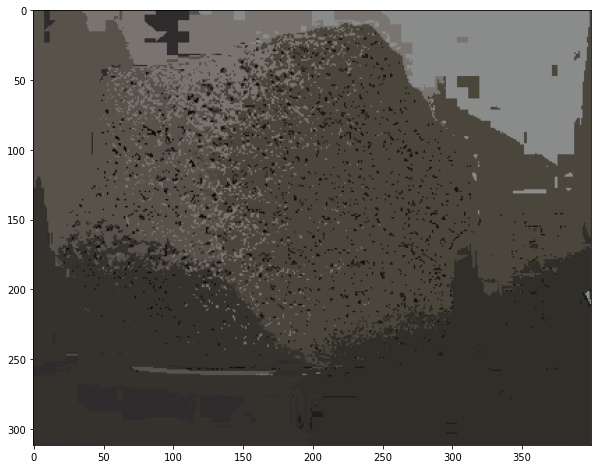

(312, 400, 3)

In [47]:
img_out_2 = color_clusters[label.flatten()]
img_out_2 = img_out_2[:,:3].reshape((lab.shape))

img_rgb = cv.cvtColor(img_out_2,cv.COLOR_HSV2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.show()

img_out_2.shape

### Prueba con Mean Shift

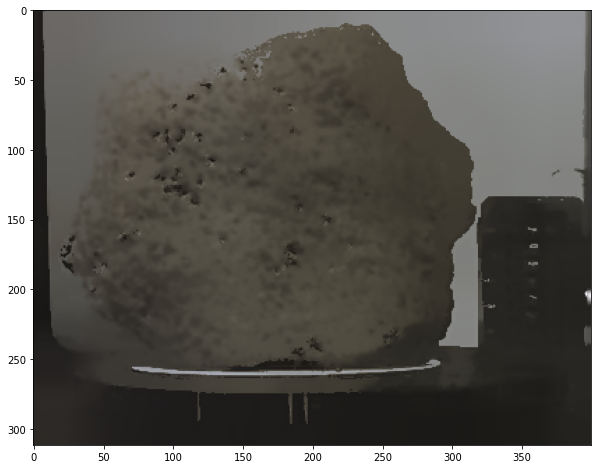

In [263]:
sp = 20
sr = 40

img_out_3=cv.pyrMeanShiftFiltering(imgRGB, sp, sr)

plt.figure(figsize=(10,10))
plt.imshow(img_out_3)


### Conclusiones

Los resultados mejoran con HSV normalizado sin embargo, creo que la mejor característica que tiene el objeto para ser segmentado es la textura que podría intentarse con lbp.